In [14]:
# Check that imports for the rest of the file work.
!pip install tensorflow
!pip install tensorflow-gan
!pip install tensorflow-datasets
!pip install keras
!pip install opencv-python
import tensorflow.compat.v1 as tf
import tensorflow_gan as tfgan
import tensorflow_datasets as tfds
import matplotlib.pyplot as plt
import numpy as np

# Allow matplotlib images to render immediately.
%matplotlib inline
tf.logging.set_verbosity(tf.logging.ERROR)  # Disable noisy outputs.
#evaluates operations immediately without building graphs

tf.disable_v2_behavior()
tf.compat.v1.enable_resource_variables()

In [15]:
# import tempfile
# import tensorflow_hub as tfhub
# tmpdir = tempfile.mkdtemp()

# modGraph = tf.Graph()
# with tf.Session(graph= tf.compat.v1.get_default_graph()) as session: 
#     mm = 'https://tfhub.dev/deepmind/ganeval-cifar10-convnet/1'
#     module = tfhub.Module(mm)mport tempfile
# import tensorflow_hub as tfhub
# tmpdir = tempfile.mkdtemp()

# modGraph = tf.Graph()
# with tf.Session(graph= tf.compat.v1.get_default_graph()) as session: 
#     mm = 'https://tfhub.dev/deepmind/ganeval-cifar10-convnet/1'
#     module = tfhub.Module(mm)

In [16]:
# from google.colab import drive
# drive.mount('/content/gdrive')

In [17]:
# import os
# from PIL import Image, ImageOps
# import matplotlib.pyplot as plt
# import numpy as np
# import pathlib
# shirtDir = os.listdir("SixDollarImages/")

# import tensorflow_datasets as tfds
# import tensorflow.compat.v1 as tf
# import gc
# import cv2

# g = tf.Graph()

# # with tf.Session(graph=g) as session:
# def input_fn(mode, params):

#   shirtListTrain = []
#   shirtListTest = []
#   index = 0

#   for file in shirtDir:
#     im = Image.open("SixDollarImages/" + file)
#     im = im.resize((112, 112))
#     # im = im.resize((32, 32))
#     # im = im.resize((28, 28))
#     im = im.convert("RGB")

#     im = np.array(im).reshape((112, 112, 3))
#     # im = np.array(im).reshape((32, 32, 3))
#     # im = np.array(im).reshape((28, 28, 1))
#     # im = tf.convert_to_tensor(im, dtype=tf.uint8)
#     im = tf.convert_to_tensor(im, dtype=tf.float32)

#     if index < 20:
#       shirtListTrain.append(im)
#     else:
#       shirtListTest.append(im)
#     index = index + 1

#   datasetTrain = tf.data.Dataset.from_tensor_slices(shirtListTrain)
#   datasetTest = tf.data.Dataset.from_tensor_slices(shirtListTest)

#   assert 'batch_size' in params
#   assert 'noise_dims' in params
#   bs = params['batch_size']
#   nd = params['noise_dims']
#   split = 'train' if mode == tf.estimator.ModeKeys.TRAIN else 'test'
#   shuffle = (mode == tf.estimator.ModeKeys.TRAIN)
#   just_noise = (mode == tf.estimator.ModeKeys.PREDICT)
  
#   #for each tensor call tf.random_normal
#   #lambda is an unnamed python function 
#   # _ is used to ignore certian values, here we are ignoring the index
#   noise_ds = (tf.data.Dataset.from_tensors(0).repeat()
#               .map(lambda _: tf.random_normal([bs, nd])))
  
#   if just_noise:
#     return noise_ds
  
#   #define everything as tensors
#   def process_path(tensorInput):
#     #{'image': <tf.Tensor 'args_0:0' shape=(28, 28, 1) dtype=uint8>, 'label': <tf.Tensor 'args_1:0' shape=() dtype=int64>}
#     image = (tf.cast(tensorInput, tf.float32) - 127.5) / 127.5
#     #Tensor("truediv:0", shape=(28, 28, 1), dtype=float32)

#     return image

#   if split == 'train':
#     #returns a map() object (which is an iterator)
#     #stores data in a temporary location instead of retrieving from source everytime
    
#     images_ds = datasetTrain.map(process_path)
      
#   else:
#     images_ds = datasetTest.map(process_path)

#   if shuffle:
#     images_ds = images_ds.shuffle(
#         buffer_size=5, reshuffle_each_iteration=True)
#   images_ds = (images_ds.batch(bs, drop_remainder=True)
#               .prefetch(tf.data.experimental.AUTOTUNE))


#   # <PrefetchDataset shapes: (5, 28, 28, 1), types: tf.float32>
#   return tf.data.Dataset.zip((noise_ds, images_ds))


import tensorflow_datasets as tfds
import tensorflow.compat.v1 as tf

def input_fn(mode, params):
  assert 'batch_size' in params
  assert 'noise_dims' in params
  bs = params['batch_size']
  nd = params['noise_dims']
  # split = 'train' if mode == tf.estimator.ModeKeys.TRAIN else 'test'
  split = 'train' if mode == tf.estimator.ModeKeys.TRAIN else 'train'
  shuffle = (mode == tf.estimator.ModeKeys.TRAIN)
  just_noise = (mode == tf.estimator.ModeKeys.PREDICT)
  
  noise_ds = (tf.data.Dataset.from_tensors(0).repeat()
              .map(lambda _: tf.random.normal([bs, nd])))
  
  if just_noise:
    return noise_ds

  def _preprocess(element):
    # Map [0, 255] to [-1, 1].
    images = (tf.cast(element['image'], tf.float32) - 127.5) / 127.5
    return images
  
  images_ds = (tfds.load('cifar10', split=split)
               .map(_preprocess)
               .cache()
               .repeat())
  if shuffle:
    images_ds = images_ds.shuffle(
        buffer_size=10000, reshuffle_each_iteration=True)
  images_ds = (images_ds.batch(bs, drop_remainder=True)
               .prefetch(tf.data.experimental.AUTOTUNE))

  print(images_ds)
  return tf.data.Dataset.zip((noise_ds, images_ds))

In [18]:
# import tempfile
# import tensorflow_hub as tfhub
# tmpdir = tempfile.mkdtemp()

# INCEPTION_MODULE = "https://tfhub.dev/google/efficientnet/b0/classification/1"
# m = tf.keras.Sequential([tfhub.KerasLayer(INCEPTION_MODULE)])
# # m = tfhub.load(INCEPTION_MODULE)
# checkpoint = tf.train.Checkpoint(model=m)
# # inceptionv3_saved_path = os.path.join(tmpdir, "inceptionv3/1/")
# # tf.saved_model.save(pretrained_model, inceptionv3_saved_path)

# # save_path = checkpoint.save('/tmp/bclass_checkpoint')
# save_path = checkpoint.save('save/RestoreV2')

In [19]:
# import matplotlib.pyplot as plt
# import tensorflow_datasets as tfds
# import tensorflow_gan as tfgan
# import numpy as np

# params = {'batch_size': 100, 'noise_dims':64}
# with tf.Graph().as_default():
#   ds = input_fn(tf.estimator.ModeKeys.TRAIN, params)
#   numpy_imgs = next(iter(tfds.as_numpy(ds)))[1]
# img_grid = tfgan.eval.python_image_grid(numpy_imgs, grid_shape=(10, 10))
# plt.axis('off')
# plt.imshow(np.squeeze(img_grid))
# plt.show()

In [20]:
def _dense(inputs, units, l2_weight):
  return tf.layers.dense(
      inputs, units, None,
      kernel_initializer=tf.keras.initializers.glorot_uniform,
      kernel_regularizer=tf.keras.regularizers.l2(l=l2_weight),
      bias_regularizer=tf.keras.regularizers.l2(l=l2_weight))

def _batch_norm(inputs, is_training):
  return tf.layers.batch_normalization(
      inputs, momentum=0.999, epsilon=0.001, training=is_training)

def _deconv2d(inputs, filters, kernel_size, stride, l2_weight):
  return tf.layers.conv2d_transpose(
      inputs, filters, [kernel_size, kernel_size], strides=[stride, stride], 
      activation=tf.nn.relu, padding='same',
      kernel_initializer=tf.keras.initializers.glorot_uniform,
      kernel_regularizer=tf.keras.regularizers.l2(l=l2_weight),
      bias_regularizer=tf.keras.regularizers.l2(l=l2_weight))

def _conv2d(inputs, filters, kernel_size, stride, l2_weight):
  return tf.layers.conv2d(
      inputs, filters, [kernel_size, kernel_size], strides=[stride, stride], 
      activation=None, padding='same',
      kernel_initializer=tf.keras.initializers.glorot_uniform,
      kernel_regularizer=tf.keras.regularizers.l2(l=l2_weight),
      bias_regularizer=tf.keras.regularizers.l2(l=l2_weight))
    

In [21]:
def unconditional_generator(noise, mode, weight_decay=2.5e-5):
  # """Generator to produce unconditional MNIST images."""
  is_training = (mode == tf.estimator.ModeKeys.TRAIN)
  
  sf = 16

  net = _dense(noise, 4 * 4 * (sf * 8), weight_decay)
  net = _batch_norm(net, is_training)
  net = tf.reshape(net, [-1, 4, 4, (sf * 8)])

  net = _deconv2d(net, (sf * 4), 5, 2, weight_decay)
  net = tf.nn.relu(_batch_norm(net, is_training))

  net = _deconv2d(net, (sf * 2), 5, 2, weight_decay)
  net = tf.nn.relu(_batch_norm(net, is_training))

  net = _deconv2d(net, (sf * 2), 5, 2, weight_decay)
  net = tf.nn.relu(_batch_norm(net, is_training))

  net = _deconv2d(net, (sf * 2), 5, 2, weight_decay)
  net = tf.nn.relu(_batch_norm(net, is_training))

  net = _conv2d(net, 3, 5, 2, 0.0)
  net = tf.tanh(net)

  return net

In [22]:
_leaky_relu = lambda net: tf.nn.leaky_relu(net, alpha=0.01)

def unconditional_discriminator(img, unused_conditioning, mode, weight_decay=2.5e-5):
  is_training = (mode == tf.estimator.ModeKeys.TRAIN)
  
  sf = 16
  net = _conv2d(img, sf, 5, 2, weight_decay)
  net = _batch_norm(net, is_training)
  net = _conv2d(img, sf, 5, 2, weight_decay)
  net = _batch_norm(net, is_training)
  net = _leaky_relu(net)

  net = _conv2d(img, sf * 2, 5, 2, weight_decay)
  net = _batch_norm(net, is_training)
  net = _conv2d(img, sf * 2, 5, 2, weight_decay)
  net = _batch_norm(net, is_training)
  net = _leaky_relu(net)

  net = _conv2d(img, sf * 4, 5, 2, weight_decay)
  net = _batch_norm(net, is_training)
  net = _conv2d(img, sf * 4, 5, 2, weight_decay)
  net = _batch_norm(net, is_training)
  net = _leaky_relu(net)

  net = _conv2d(img, sf * 8, 5, 2, weight_decay)
  net = _batch_norm(net, is_training)
  net = _conv2d(img, sf * 8, 5, 2, weight_decay)
  net = _batch_norm(net, is_training)
  net = _leaky_relu(net)

  net = tf.keras.layers.GlobalMaxPooling2D()(net)
  net = _dense(net, 1, weight_decay)

  return net

In [23]:
# calculate inception score with Keras
from math import floor
from numpy import ones
from numpy import expand_dims
from numpy import log
from numpy import mean
from numpy import std
from numpy import exp
from keras.applications.inception_v3 import InceptionV3
from keras.applications.inception_v3 import preprocess_input
from tensorflow.python.tools.inspect_checkpoint import print_tensors_in_checkpoint_file

from tensorflow_gan.examples.cifar import util

import tempfile
import tensorflow_hub as tfhub
tmpdir = tempfile.mkdtemp()

# INCEPTION_MODULE = "https://tfhub.dev/google/imagenet/inception_v3/classification/5"
INCEPTION_MODULE = "https://tfhub.dev/google/imagenet/inception_v3/classification/1"
MNIST_MODULE = 'https://tfhub.dev/tensorflow/tfgan/eval/mnist/logits/1'
mm = 'https://tfhub.dev/deepmind/ganeval-cifar10-convnet/1'

# def calculate_inception_score(images, n_split=1, eps=1E-16):
#     inception_classifier_fn = tfhub.load(INCEPTION_MODULE)
#     score = tfgan.eval.classifier_score(images, inception_classifier_fn, 1)
#     score.shape.assert_is_compatible_with([])

#     return score

def calculate_frechet_distance(real_images, generated_images, num_batches=1):
    # # # m = tf.keras.Sequential([tfhub.KerasLayer(INCEPTION_MODULE)])
    # # # inception_classifier_fn = tfhub.load(INCEPTION_MODULE)
    # module = tfhub.Module(mm)
    # frechet_distance = tfgan.eval.frechet_classifier_distance(real_images, generated_images, module, num_batches)
    frechet_distance = tfgan.eval.frechet_inception_distance(real_images, generated_images, num_batches=1)
    frechet_distance.shape.assert_is_compatible_with([])

    return frechet_distance

def calculate_inception_score(images, n_split=1, eps=1E-16):
    # score = util.get_inception_scores(images, 5, 5)
    score = tfgan.eval.inception_score(images, num_batches=1)
    return score
    

In [24]:
from tensorflow_gan.examples.mnist import util as eval_util
import os

def get_eval_metric_ops_fn(gan_model):
  real_data_logits = tf.reduce_mean(gan_model.discriminator_real_outputs)
  gen_data_logits = tf.reduce_mean(gan_model.discriminator_gen_outputs)
  
  print("incep score")
  real_mnist_score = calculate_inception_score(gan_model.real_data)
  generated_mnist_score = calculate_inception_score(gan_model.generated_data)
  
  frechet_distance = calculate_frechet_distance(
      gan_model.real_data, gan_model.generated_data)
  return {
      'real_data_logits': tf.metrics.mean(real_data_logits),
      'gen_data_logits': tf.metrics.mean(gen_data_logits),
      'real_mnist_score': tf.metrics.mean(real_mnist_score),
      'mnist_score': tf.metrics.mean(generated_mnist_score),
      'frechet_distance': tf.metrics.mean(frechet_distance),
  }

# def get_eval_metric_ops_fn(gan_model):
#   real_data_logits = tf.reduce_mean(gan_model.discriminator_real_outputs)
#   gen_data_logits = tf.reduce_mean(gan_model.discriminator_gen_outputs)
#   real_mnist_score = eval_util.mnist_score(gan_model.real_data)
#   generated_mnist_score = eval_util.mnist_score(gan_model.generated_data)
#   frechet_distance = eval_util.mnist_frechet_distance(
#       gan_model.real_data, gan_model.generated_data)
#   return {
#       'real_data_logits': tf.metrics.mean(real_data_logits),
#       'gen_data_logits': tf.metrics.mean(gen_data_logits),
#       'real_mnist_score': tf.metrics.mean(real_mnist_score),
#       'mnist_score': tf.metrics.mean(generated_mnist_score),
#       'frechet_distance': tf.metrics.mean(frechet_distance),
#   }

In [27]:
train_batch_size = 5 #@param
noise_dimensions = 64 #@param
# noise_dimensions = 128 #@param
# generator_lr = 0.001 #@param
generator_lr = 0.0002 #@param
discriminator_lr = 0.0002 #@param

def gen_opt():
  gstep = tf.train.get_or_create_global_step()
  base_lr = generator_lr
  # Halve the learning rate at 1000 steps.
  lr = tf.cond(gstep < 1000, lambda: base_lr, lambda: base_lr / 2.0)
  return tf.train.AdamOptimizer(lr, 0.5)

gan_estimator = tfgan.estimator.GANEstimator(
    generator_fn=unconditional_generator,
    discriminator_fn=unconditional_discriminator,
    generator_loss_fn=tfgan.losses.wasserstein_generator_loss,
    discriminator_loss_fn=tfgan.losses.wasserstein_discriminator_loss,
    params={'batch_size': train_batch_size, 'noise_dims': noise_dimensions},
    generator_optimizer=gen_opt,
    discriminator_optimizer=tf.train.AdamOptimizer(discriminator_lr, 0.5),
    get_eval_metric_ops_fn=get_eval_metric_ops_fn)

train
<PrefetchDataset shapes: (5, 32, 32, 3), types: tf.float32>
Time since start: 2.15 min
Trained from step 0 to 500 in 3.87 steps / sec
<PrefetchDataset shapes: (5, 32, 32, 3), types: tf.float32>
incep score


C:\Users\Brad\anaconda3\lib\site-packages\tensorflow\python\keras\legacy_tf_layers\core.py:329: UserWarning: `tf.layers.flatten` is deprecated and will be removed in a future version. Please use `tf.keras.layers.Flatten` instead.
  warnings.warn('`tf.layers.flatten` is deprecated and '


Average discriminator output on Real: 3.51  Fake: -0.33
Inception Score: 1.00 / 3.17  Frechet Distance: 562.28
predict


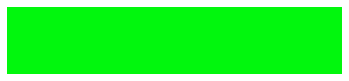

train
<PrefetchDataset shapes: (5, 32, 32, 3), types: tf.float32>


KeyboardInterrupt: 

In [28]:
# Disable noisy output.
tf.autograph.set_verbosity(0, False)

#IMPORTNATN
#what is the inception score for mnist?

import time
from tensorflow.python.tools.inspect_checkpoint import print_tensors_in_checkpoint_file
steps_per_eval = 500 #@param
max_train_steps = 20000 #@param
batches_for_eval_metrics = 5 #@param|

# Used to track metrics.
steps = []
real_logits, fake_logits = [], []
real_mnist_scores, mnist_scores, frechet_distances = [], [], []

cur_step = 0
start_time = time.time()

while cur_step < max_train_steps:
  next_step = min(cur_step + steps_per_eval, max_train_steps)

  start = time.time()
  print("train")
  gan_estimator.train(input_fn, max_steps=next_step)
  steps_taken = next_step - cur_step
  time_taken = time.time() - start
  print('Time since start: %.2f min' % ((time.time() - start_time) / 60.0))
  print('Trained from step %i to %i in %.2f steps / sec' % (
      cur_step, next_step, steps_taken / time_taken))
  cur_step = next_step
  
  #save import model to check point
  
  # Calculate some metrics.
  metrics = gan_estimator.evaluate(input_fn, steps=batches_for_eval_metrics)

  steps.append(cur_step)
  real_logits.append(metrics['real_data_logits'])
  fake_logits.append(metrics['gen_data_logits'])
  real_mnist_scores.append(metrics['real_mnist_score'])
  mnist_scores.append(metrics['mnist_score'])
  frechet_distances.append(metrics['frechet_distance'])
  print('Average discriminator output on Real: %.2f  Fake: %.2f' % (
      real_logits[-1], fake_logits[-1]))
  print('Inception Score: %.2f / %.2f  Frechet Distance: %.2f' % (
      mnist_scores[-1], real_mnist_scores[-1], frechet_distances[-1]))
  
  # Vizualize some images.
  print("predict")
  iterator = gan_estimator.predict(
      input_fn, hooks=[tf.train.StopAtStepHook(num_steps=21)])
  try:
    imgs = np.array([next(iterator) for _ in range(20)])
  except StopIteration:
    pass
  tiled = tfgan.eval.python_image_grid(imgs, grid_shape=(2, 10))
  plt.axis('off')
  plt.imshow((np.squeeze(tiled) * 255).astype(np.uint8))
  plt.show()
  
  
# Plot the metrics vs step.
plt.title('MNIST Frechet distance per step')
plt.plot(steps, frechet_distances)
plt.figure()
plt.title('MNIST Score per step')
plt.plot(steps, mnist_scores)
plt.plot(steps, real_mnist_scores)
plt.show()